# Analysis of Stack Overflow Survey


## Table of Contents
- [Introduction](#intro)
- [1. Business Understanding](#business_understanding)
- [2. Data Understanding](#data_understanding)
- [3. Data Preparation](#data_preparation)
- [4. Modeling](#c)
- [5. Evaluation](#evaluation)
- [6. Deployment](#deployment)


<a id='intro'></a>
## Introduction

This project is an analysis of the Stack Overflow Surveys held 2019 and 2020. Main goal of this project is to follow through the complete Cross-Industry Standard Process for Data Mining. 

- 2019 survey: 88,883 responses
- 2020 survey: 64,461 responses

In the following sections we will look into these surveys and will learn what the programmers on Stack Overflow think about what programming language to learn next.


<a id='business_understanding'></a>
## 1. Business Understanding

In this section we want to understand the problem.  
Questions:  
1. Statistics
    - How many people did take part at the survey 2019 and 2020?
    - What is the language most people work with 2020?
    - How did the preferences in programming language change over time?
    - Is there a correlation between job satisfaction and programming language people work with?
    
    - How much do people of each programming language earn?
    - IDE, OpenSource, Version Control, FrameWork, DataBase, Platform
    - What is the most popular programming language in the world compared to Germany?
    - How differ coding experience, language preferences, roles, age and salary among available countries.

2. Machine Learning
    - Anything we can predict? Happyness?



<a id='data_understanding'></a>
## 2. Data Understanding

Interesting columns:
- Years since learning to code
- Years Coding Professionaly
- Databases
- Frameworks, Libraries and Tools
- Programming, Scripting and Markup Languages
- Career Satisfaction / Job Satisfaction
- 

#### Import external libraries

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score, mean_squared_error
from collections import Counter
%matplotlib inline

### 2.1 Gather data

#### Read data from csv-file

In [2]:
# Import data from local csv to pandas dataframe

df_2019_survey = pd.read_csv('./Data/developer_survey_2019/survey_results_public.csv')
df_2019_schema = pd.read_csv('./Data/developer_survey_2019/survey_results_schema.csv')

df_2020_survey = pd.read_csv('./Data/developer_survey_2020/survey_results_public.csv')
df_2020_schema = pd.read_csv('./Data/developer_survey_2020/survey_results_schema.csv')

### 2.2. Assess data

After gathering each of the above pieces of data, they are assessed visually and programmatically for quality and tidiness issues. Requirements to be met:

- Quality requirements:
    - Completeness: All necessary records in dataframes, no specific rows, columns or cells missing.
    - Validity: No records available, that do not conform schema.
    - Accuracy: No wrong data, that is valid.
    - Consistency: No data, that is valid and accurate, but referred to in multiple correct ways.
- Tidiniss requirements (as defined by Hadley Wickham):
    - each variable is a column
    - each observation is a row
    - each type of observational unit is a table.

Check amount of questions in each survey and how many responses:

In [3]:
# Number of rows in the dataset

def print_dimensions(df):
    print('Rows : ' + str(df.shape[0]))
    print('Columns : ' + str(df.shape[1]))

print('2019')
print_dimensions(df_2019_survey)

print('2020')
print_dimensions(df_2020_survey)

2019
Rows : 88883
Columns : 85
2020
Rows : 64461
Columns : 61


In [4]:
# Display all columns for visual analysis
pd.set_option('display.max_columns', None) # show all columns

In [5]:
# Visual analysis 2019 survey
df_2019_survey.head(n=5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [6]:
# Visual analysis 2020 survey
df_2020_survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [7]:
# set back to default value
pd.reset_option('max_columns') 

For a better understanding of the questions context, the following function prints the description:

In [8]:
# Function to understand the column name while visually analyzing the dataframe
def get_description(column_name, schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    
    desc = list(schema.query('Column == @column_name').QuestionText)[0]

    return desc


In [9]:
# Put name of column here to check the description of the column
get_description('LanguageDesireNextYear', df_2020_schema)

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

A list of all columns in the 2019 survey:

In [139]:
sorted(df_2019_survey)

['Age',
 'Age1stCode',
 'BetterLife',
 'BlockchainIs',
 'BlockchainOrg',
 'CareerSat',
 'CodeRev',
 'CodeRevHrs',
 'CompFreq',
 'CompTotal',
 'Containers',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'Dependents',
 'DevEnviron',
 'DevType',
 'EdLevel',
 'EduOther',
 'Employment',
 'EntTeams',
 'Ethnicity',
 'Extraversion',
 'FizzBuzz',
 'Gender',
 'Hobbyist',
 'ITperson',
 'ImpSyn',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'LastHireDate',
 'LastInt',
 'MainBranch',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'OffOn',
 'OpSys',
 'OpenSource',
 'OpenSourcer',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseHow',
 'PurchaseWhat',
 'Respondent',
 'ResumeUpdate',
 'SOAccount',
 'SOComm',
 'SOFindAnswer',
 'SOHowMuchTime',
 'SOJobs',
 'SONewContent',
 'SOPartFreq',
 'SOTimeSaved',
 'SOVisit1st',
 'SOVisit

A list of all columns in the 2020 survey:

In [12]:
sorted(df_2020_survey)

['Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'Hobbyist',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MainBranch',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Respondent',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'Sexuality',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'W

### b. Programmatic assessment

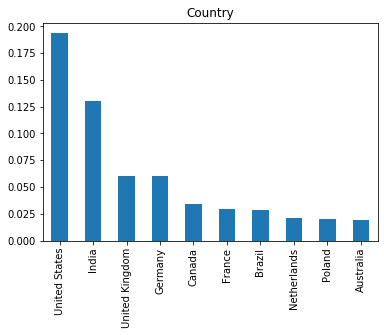

In [13]:
# Where are the participants of the survey from?
country_rows = df_2020_survey.Country.value_counts()

(country_rows[:10]/df_2020_survey.shape[0]).plot(kind="bar");
plt.title("Country");

Check what columns have low amount of null values for possible use in prediction model:

In [15]:
# Which columns have less than 30% missing values?
max_30_perc_missing_cols = set(df_2020_survey.columns[df_2020_survey.isnull().mean() < 0.3])#Provide a set of columns with more than 75% of the values missing
max_30_perc_missing_cols;

In [16]:
# Which columns have more than 30% missing values?
min_30_perc_missing_cols = set(df_2020_survey.columns[df_2020_survey.isnull().mean() > 0.5])#Provide a set of columns with more than 75% of the values missing
min_30_perc_missing_cols;

In [18]:
#The exact proportion of missing values in the Job Satisfaction column
df_2020_survey.DatabaseDesireNextYear.isnull().mean() 

0.3163308046725927

### Findings, which contradict requirements:

- **Validity**: A lot of columns, like`LanguageDesireNextYear`, `DatabaseDesireNextYear`, , `WebFrameDesireNextYear`, `PlatformDesireNextYear` may hold more than one answer per row. Can not use possible_vals approach (use a list of possible values and search for them) as C will be found in C++, C' and Objective-C, same for Java and JavaScript. 

- **Tidiniss**: The information needed is spread between the two dataframes of the two surveys. All data needed for a comparison or visualization should be in one dataframe.


### General Findings:
- Only one real numerical column: `ConvertedSalary`. As `Respondent`is just an ID counter.

<a id='data_preparation'></a>
## 3. Data Preparation

- Age 2019 and 2020 in int/float.
- Gender is in all surveys

- 2019: `LanguageDesireNextYear`, `DatabaseDesireNextYear`, , `WebFrameDesireNextYear`, `PlatformDesireNextYear`

- 2020: `LanguageDesireNextYear`, `DatabaseDesireNextYear`, `WebframeDesireNextYear`, `PlatformDesireNextYear`

### 3.2. Clean data

### Issue 1:
#### Observe:
- **Validity**: In the 2020 survey `df_2020_survey` the column `LanguageDesireNextYear` in some cases holds multiple answers per row. A developer can desire to work with one or more languages in the next year. Every, in the survey, existing combination of different languages would be treated as a possible value.

#### Define:
- Create generic functions to do the following:
    - Go through all rows of given column in dataframe, separate values by semicolon, save as list object
    - Flatten the nested objects, so that there is a list of all entries
    - Count the appearence of each unique answer in list
    - Transform that to dataframe
    - Add new column with appearences per contestant

#### Code:

In [20]:
# A function to count the actual appearence of each value 
def total_count(df, col1, col2, look_for):
    ''' 
    Args:
    df - the pandas dataframe to search in
    col1 - the column name of the column to look through
    col2 - the column to count values from
    look_for - a list of strings for which should be searched in df[col]
    
    Returns:
    new_df - a dataframe with a count for each element in look_for
    '''
    from collections import defaultdict
    new_df = defaultdict(int)
    for val in look_for:
        for row in range(df.shape[0]):
            if val in df[col1][row]:
                new_df[val] += int(df[col2][row])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df
                

In [21]:
# Can not use possible_vals approach as C will be found in C++, C' and Objective-C, same for Java and JavaScript
# Change to search for 

def separate_answers(df, column_of_interest):
    ''' Function takes dataframe and creates a new dataframe with only the column of interest. If there 
    are multiple values per row in the column of interest, the values are separated into extra rows.
    The function returns a dataframe with a count of appearence for each unique value of the column of 
    interest and the associated percentage (relative to length of initial dataframe)
    
    Args:
        df - a dataframe containing at least the column of interest
        column of interest - the name of the column of interest in the dataframe
        
    Returns:
        df_value_count - A dataframe containing the three columns 'column of interest', 'count' and 'percentage'.
        In 'column of interest' are all the unique values, in count the amount of appearences in the initial 
        dataframe and in percentage the relative appearence compared to the amount of rows in the initial dataframe.
    ''' 
 
    # Keep only column of interest
    series = df[column_of_interest]
    series.dropna(inplace=True)
    
    # Make rows with more than one entries to lists
    separated_series = series.apply(lambda x: x.split(';'))

    # Flatten nested objects
    answers_list = []
    for row in separated_series:
        for answer in row:
            answers_list.append(answer.strip())
     
    # Create a set with unique values
    possible_values = set(answers_list)
    
    # Count appearence of each unique value 
    values_with_counter = dict(Counter(answers_list))
    
    # Transform dictionary to dataframe and rename columns appropiatly
    df_value_count = pd.DataFrame.from_dict(values_with_counter, orient='index')
    df_value_count.reset_index(inplace=True)
    df_value_count.rename(columns={'index':column_of_interest, 0:'count'}, inplace=True)
    
    
    # Add column with percentage
    df_value_count.set_index(column_of_interest, inplace=True)
    df_value_count['percentage'] = df_value_count/df.shape[0] 
    df_value_count.reset_index(level=0, inplace=True)

    df_value_count.sort_values(by='percentage', ascending=False, inplace=True)
    #df_value_count.rename(columns={'percentage':column_of_interest+'_percentage', 
    #                               'count':column_of_interest+'_count'}, inplace=True)

    return df_value_count

#### Test:

In [180]:
# Check if numbers match https://insights.stackoverflow.com/survey/2019#technology
df_a_separated = separate_answers(df_2019_survey, 'LanguageWorkedWith')
df_a_separated

,LanguageWorkedWith,count,percentage
2,JavaScript,59219,0.666258
0,HTML/CSS,55466,0.624034
7,SQL,47544,0.534905
3,Python,36443,0.410011
1,Java,35917,0.404093
10,Bash/Shell/PowerShell,31991,0.359923
6,C#,27097,0.304861
17,PHP,23030,0.259105
4,C++,20524,0.230910
13,TypeScript,18523,0.208398


### Issue 2:
#### Observe:

- **Tidiniss**: The information needed is spread between the two dataframes of the two surveys. All data needed for a comparison or visualization should be in one dataframe.

#### Define:
- Create generic functions to do the following:
    - Take two dataframes 
    - Cut the values which won't be needed for a visualization
    - Create one dataframe from the two input dataframes either by merging or by appending

#### Code:

In [144]:
def create_survey_comparison(df_a, tag_a, df_b, tag_b, column, cut, merge):
    '''Funtion creates for a given column a comparison between two dataframes.
    
    Args:
        df19 - datframe a
        tag_a - describes what differs a from b
        df20 - dataframe b
        tag_b - describes what differs b from a
        column - column which should be compared
        cut - allows to cut length of dataframe
        merge - option if dataframes are merged or appended
        
    Returns:
        survey_comparison - a dataframe containing the comparison of the input column of both input dataframes
    '''
    
    # Separate answers, where there is more than one per row
    df_a_separated = separate_answers(df_a, column)
    df_b_separated = separate_answers(df_b, column)
    
    # only keep x=cut values 
    df_a_separated = df_a_separated[:cut]
    df_b_separated = df_b_separated[:cut]
     
    if merge:
        # Merge dataframes of 2019 and 2020 to one
        survey_comparison = pd.merge(df_a_separated, df_b_separated, on=column, 
                                     how='outer', suffixes=('_' + tag_a, '_' + tag_b))
    
    else: 
        df_a_separated['hue'] = tag_a
        df_b_separated['hue'] = tag_b
        survey_comparison = df_a_separated.append(df_b_separated)
    
    return survey_comparison

#### Test:

In [176]:
# Check if append functions correctly
test_1 = create_survey_comparison(
    df_2019_survey, '2019', df_2020_survey, '2020', 'LanguageWorkedWith', 7, merge=False)

test_1.head()

,LanguageWorkedWith,count,percentage,hue
2,JavaScript,59219,0.666258,2019
0,HTML/CSS,55466,0.624034,2019
7,SQL,47544,0.534905,2019
3,Python,36443,0.410011,2019
1,Java,35917,0.404093,2019


In [179]:
# Check if merge functions correctly 
test_2 = create_survey_comparison(
    df_2019_survey, '2019', df_2020_survey, '2020', 'LanguageWorkedWith', 3, merge=True)

test_2.head()

,LanguageWorkedWith,count_2019,percentage_2019,count_2020,percentage_2020
0,JavaScript,59219,0.666258,38822,0.602256
1,HTML/CSS,55466,0.624034,36181,0.561285
2,SQL,47544,0.534905,31413,0.487318


### Clean data

In [145]:
language_worked = create_survey_comparison(
    df_2019_survey, '2019', df_2020_survey, '2020', 'LanguageWorkedWith', 7, merge=False)

language_desired = create_survey_comparison(
    df_2019_survey, '2019', df_2020_survey, '2020', 'LanguageDesireNextYear', 7, merge=False)

database_worked = create_survey_comparison(
    df_2019_survey, '2019', df_2020_survey, '2020', 'DatabaseWorkedWith', 7, merge=False)

database_desired = create_survey_comparison(
    df_2019_survey, '2019', df_2020_survey, '2020', 'DatabaseDesireNextYear', 7, merge=False)


platform_worked = create_survey_comparison(
    df_2019_survey, '2019', df_2020_survey, '2020', 'PlatformWorkedWith', 7, merge=False)

platform_desired = create_survey_comparison(
    df_2019_survey, '2019', df_2020_survey, '2020', 'PlatformDesireNextYear', 7, merge=False)


df_2019_survey.rename(columns={'WebFrameWorkedWith':'WebframeWorkedWith', 
                               'WebFrameDesireNextYear':'WebframeDesireNextYear'}, inplace=False)

webframe_worked = create_survey_comparison(
    df_2019_survey, '2019', df_2020_survey, '2020', 'WebframeWorkedWith', 7, merge=False)

webframe_desired = create_survey_comparison(
    df_2019_survey, '2019', df_2020_survey, '2020', 'WebframeDesireNextYear', 7, merge=False)



In [146]:
language_desired

,LanguageDesireNextYear,count,percentage,hue
6,JavaScript,44739,0.503347,2019
7,Python,40006,0.450097,2019
4,HTML/CSS,36645,0.412284,2019
8,SQL,33566,0.377643,2019
16,TypeScript,23720,0.266868,2019
5,Java,23508,0.264483,2019
2,C#,22449,0.252568,2019
3,Python,26682,0.413925,2020
2,JavaScript,26188,0.406261,2020
1,HTML/CSS,20771,0.322226,2020


In [ ]:
df_2020_survey.JobSat.value_counts()

In [ ]:
Country

Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

In [140]:
get_description('JobSat', df_2020_schema)

'How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)'

#### Test:

<a id='modeling'></a>
## 4. Modeling

...

### Create plotting functions for easy exploration/modeling

In [150]:
def plot_language(df, year, column_name, value, title):
    
    
    df = df.query('hue == @year')
    df.sort_values(by='percentage', ascending=True, inplace=True)
    
    # Set up the matplotlib figure
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_axes([0,0,1,1])

    # plot
    ax.barh(df[column_name],df[value])


    ax.grid()
    plt.xlabel('Percentage of responses containing this programming language', fontsize=14);
    plt.ylabel('Programming Language', fontsize=14);
    plt.title(title, fontsize=16);
    plt.show()
    ax.grid(False)

    fig.savefig('./Output/'+column_name+year+'_percentage'+year+'.jpg', bbox_inches='tight')

In [171]:
def plot_language_comparison(df, column_name, value, title):
    
    df.sort_values(by='percentage', ascending=False, inplace=True)
    
    # Set up the matplotlib figure
    fig = plt.figure(figsize=(8,8))
    
    # Plot
    sb.barplot(x = value, y = column_name, hue = 'hue', data = df)

    plt.xlabel('Percentage of responses containing this programming language', fontsize = 14)
    plt.ylabel("Programming Languages", fontsize = 14)
    plt.legend(fontsize='x-large', title_fontsize='40')
    plt.title(title, size = 16)
    plt.show()

  
    fig.savefig('./Output/'+column_name+'_comparison_percentage.jpg', bbox_inches='tight')


# Figure 1 — Percentage of use of programming languages among all the cited programming 
# languages by the respondents.


### Start Exploration and Modeling

#### Question 1: What is the language most people work with 2020?

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


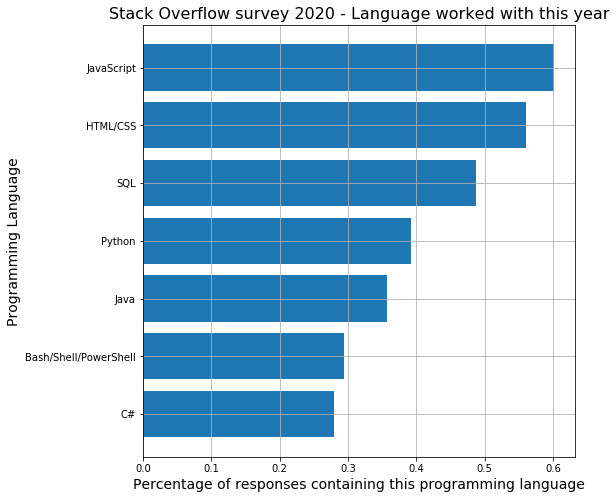

In [153]:
plot_language(language_worked, '2020', 'LanguageWorkedWith', 'percentage',
             'Stack Overflow survey 2020 - Language worked with this year')

In the survey of 2020 among the 64,461 responses to the question "What programming language did you work with this year?", the most mentioned language is JavaScript. About 67% percent of the contestants worked with JavaScript, 62% with HTML/CSS and 54% with SQL. The language Python lands in fourth place with 41% of contestants mentioning it.

#### Question 2: How did the preferences in programming language change over time?


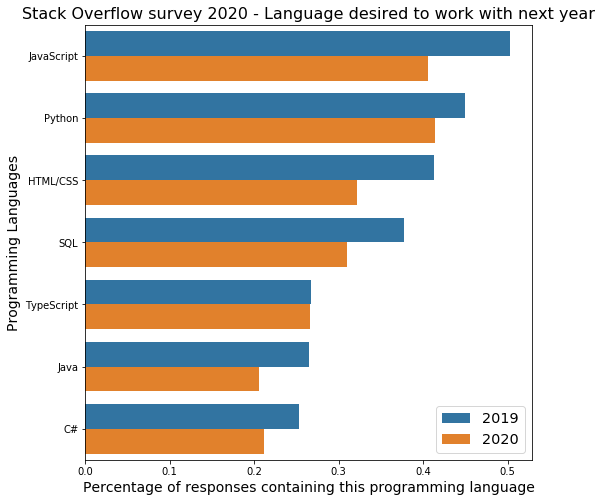

In [172]:
plot_language_comparison(language_desired, 'LanguageDesireNextYear', 'percentage',
             'Stack Overflow survey 2020 - Language desired to work with next year')

Ok, now we know what languages the survey participants work with currently, but what language do they want to work with in the future? In the 2020 survey Python (41% want to work with Python) surpassed JavaScript . This means Python is gaining popularity compared to other languages.

#### Question: Is there a correlation between job satisfaction and programming language people work with?

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


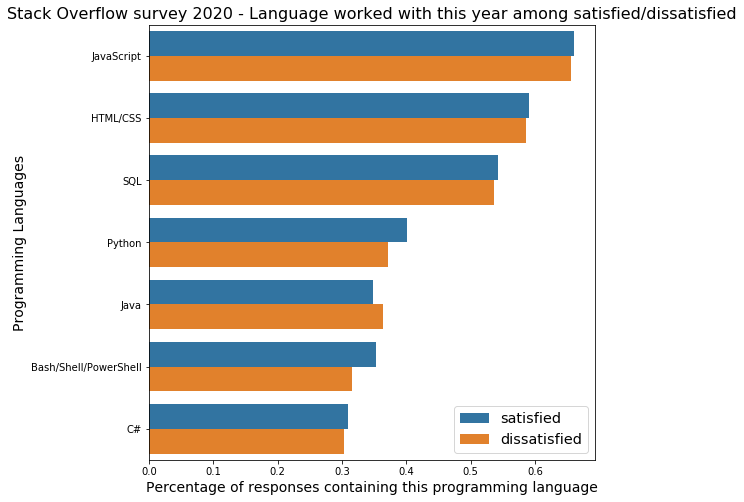

In [174]:
df_20_satisfied = df_2020_survey.query('JobSat == "Very satisfied" or JobSat == "Slightly satisfied"')
df_20_dissatisfied = df_2020_survey.query('JobSat == "Very dissatisfied" or JobSat == "Slightly dissatisfied"')

satisfied_language_desired = create_survey_comparison(df_20_satisfied, 'satisfied', 
                                                      df_20_dissatisfied, 'dissatisfied',
                                                      'LanguageWorkedWith', 7, merge=False)

plot_language_comparison(satisfied_language_desired, 'LanguageWorkedWith', 'percentage',
             'Stack Overflow survey 2020 - Language worked with this year among satisfied/dissatisfied')

In the survey of 2020 Stack Overflow asked their users how satisfied they are with their current job. The possible answers are:

- Very satisfied
- Slightly satisfied
- Neither satisfied nor dissatisfied
- Slightly dissatisfied
- Very dissatisfied

In the following graphics the percentage of responses regarding languages worked with are compared between people that feel satisfied in their job versus those that feel dissatisfied. Here satisfied groups the answers "Very satisfied" and "Slightly satisfied" and dissatisfied groups the answers "Very dissatisfied" and "Slightly dissatisfied". There seems to be no significant correlation between job satisfaction and the languages people work with.

 Intersting columns for further investigation: `Employment`, `YearsCodePro`, `NEWLearn`.


<a id='evaluation'></a>
## 5. Evaluation

...

<a id='deployment'></a>
## 6. Deployment

...

[Medium post](https://medium.com/@leopold.walther/this-data-will-help-you-decide-which-programming-language-to-learn-next-c4a5ec0a6414)